In [1]:
library(tidyverse)
library(ggplot2)
library(patchwork)
source("helper.R")

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
sinfo_path = "../../output/sims_info.tsv"
sinfoh_path = "../../output/header_sims_info.tsv"

In [3]:
win_size = 1000000
win_len = -1
padding = 0
rescf = 1

In [4]:
sims_path = "../../output/sims_results/"

In [5]:
sinfo = read.table(sinfo_path, sep="\t")
h = read.table(sinfoh_path, sep="\t", header=TRUE)
colnames(sinfo) = colnames(h)

In [6]:
diff_cols = c("delrate","delcoef","posrate","poscoef","mu", "rescf", "win_len", "padding", "chr")
#diff_cols = c("delrate","delcoef","posrate","poscoef","mu", "poscoefdecayeps", "rescf", "win_len", "padding", "chr")

In [7]:
wsize_str = paste0("win-size_",as.integer(win_size))

In [8]:
sims_folders = list.files(sims_path)[grep(wsize_str, list.files(sims_path))]

In [9]:
sims_folders[1]

[1] "sup-rand-id_0ASPD1FD6L57DMLSWJ_rep_0_win-size_1000000_sample-size_10"

In [10]:
simresults = as.data.frame(do.call(rbind, lapply(X = sims_folders, function(x) unlist(meta_from_fname(x,prop="0.4",suffix="$")))), stringsAsFactors =FALSE)

In [11]:
simresults$folderpath = sims_folders

In [12]:
tmp = unique(sinfo[sinfo$sup_rand_id %in% simresults$sup_rand_id,c(diff_cols,"sup_rand_id")])

In [13]:
simresults = left_join(simresults, tmp)

Joining, by = "sup_rand_id"



In [14]:
simresults = simresults[simresults$win_len==win_len & simresults$padding == padding & simresults$rescf==1,]

In [15]:
simresults$selregime = ifelse(simresults$posrate<1e-16,ifelse(simresults$delrate<1e-16, "neutral", "del_only"), ifelse(simresults$delrate<1e-16, "pos_only", "both"))

In [34]:
simresults$seldesc = apply(simresults,1, function(x) paste("mu-D=", x["delrate"], " mu-B=", x["posrate"], "\ncoef-D=", x["delcoef"], " coef-B=", x["poscoef"], sep=""))

In [35]:
list.files(paste0(sims_path,simresults[10,]$folderpath))

character(0)

In [36]:
tmp = simresults[1:1,]
tmp = tmp[
  with(tmp, order(delrate,posrate,-delcoef,poscoef)),
]
rownames(tmp) <- NULL
plots = apply(tmp,1,
              function(x) readRDS(paste0(sims_path,x["folderpath"],
                                         "/cor-pidxy-dT_",x["desc"],".rds"))+ggtitle(x["seldesc"]))


In [37]:
ordered = c("neutral", "del_only", "pos_only", "both")

In [38]:
classes = unique(tmp$selregime)
tmp$selregime = factor(tmp$selregime, levels=classes[order(match(classes,ordered))])

In [39]:
#combined = list()
#for (class in classes[order(match(classes,ordered))]) {
#    slice = tmp[tmp$selregime==class,]
#    slice_plots = plots[tmp$selregime==class]
#    a = wrap_plots(slice_plots, nrow=1, guides='collect')
#    combined = c(combined,list(a))
#}

In [40]:
#TODO: remove unnecessary stuff from descriptions
#TODO: figure out how to programatically create design
#TODO: sort data.frame before applying to get the plots

In [41]:
tab=table(tmp$selregime)

In [42]:
tab


both 
   1 

In [43]:
tmp

win_size,sup_rand_id,rep,sample_size,spaced_desc,desc,prop,is_ga_data,folderpath,delrate,delcoef,posrate,poscoef,mu,rescf,win_len,padding,chr,selregime,seldesc
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<fct>,<chr>
1000000,3GIHR79KVHKB6B02WF,0,10,sup-rand-id=3GIHR79KVHKB6B02WF rep=0 win-size=1000000 sample-size=10 prop-acc=0.4,sup-rand-id_3GIHR79KVHKB6B02WF_rep_0_win-size_1000000_sample-size_10_prop-acc_0.4,0.4,FALSE,sup-rand-id_3GIHR79KVHKB6B02WF_rep_0_win-size_1000000_sample-size_10,6e-09,-0.03,1e-10,0.01,6.1e-09,1,-1,0,chr12,both,mu-D=6e-09 mu-B=1e-10 coef-D=-0.030 coef-B=0.01


In [44]:
design=""
for (regime in levels(tmp$selregime)) {
    if (design != "") design = paste0(design,"\n")
    num_cols = 1:tab[regime]
    num_blanks = max(tab)-tab[regime]
    indexes = as.numeric(rownames(tmp[tmp$selregime==regime,]))
    print(LETTERS[indexes])
    print(rep("#", num_blanks))
    add = paste0(paste0(LETTERS[indexes],collapse=""), paste0(rep("#", num_blanks),collapse=""), collapse="")
    print(design)
    print(add)
    design = paste0(design,add)
    print(design)
}

[1] "A"
character(0)
[1] ""
[1] "A"
[1] "A"


Warning message:
"Removed 140 rows containing missing values (geom_point)."


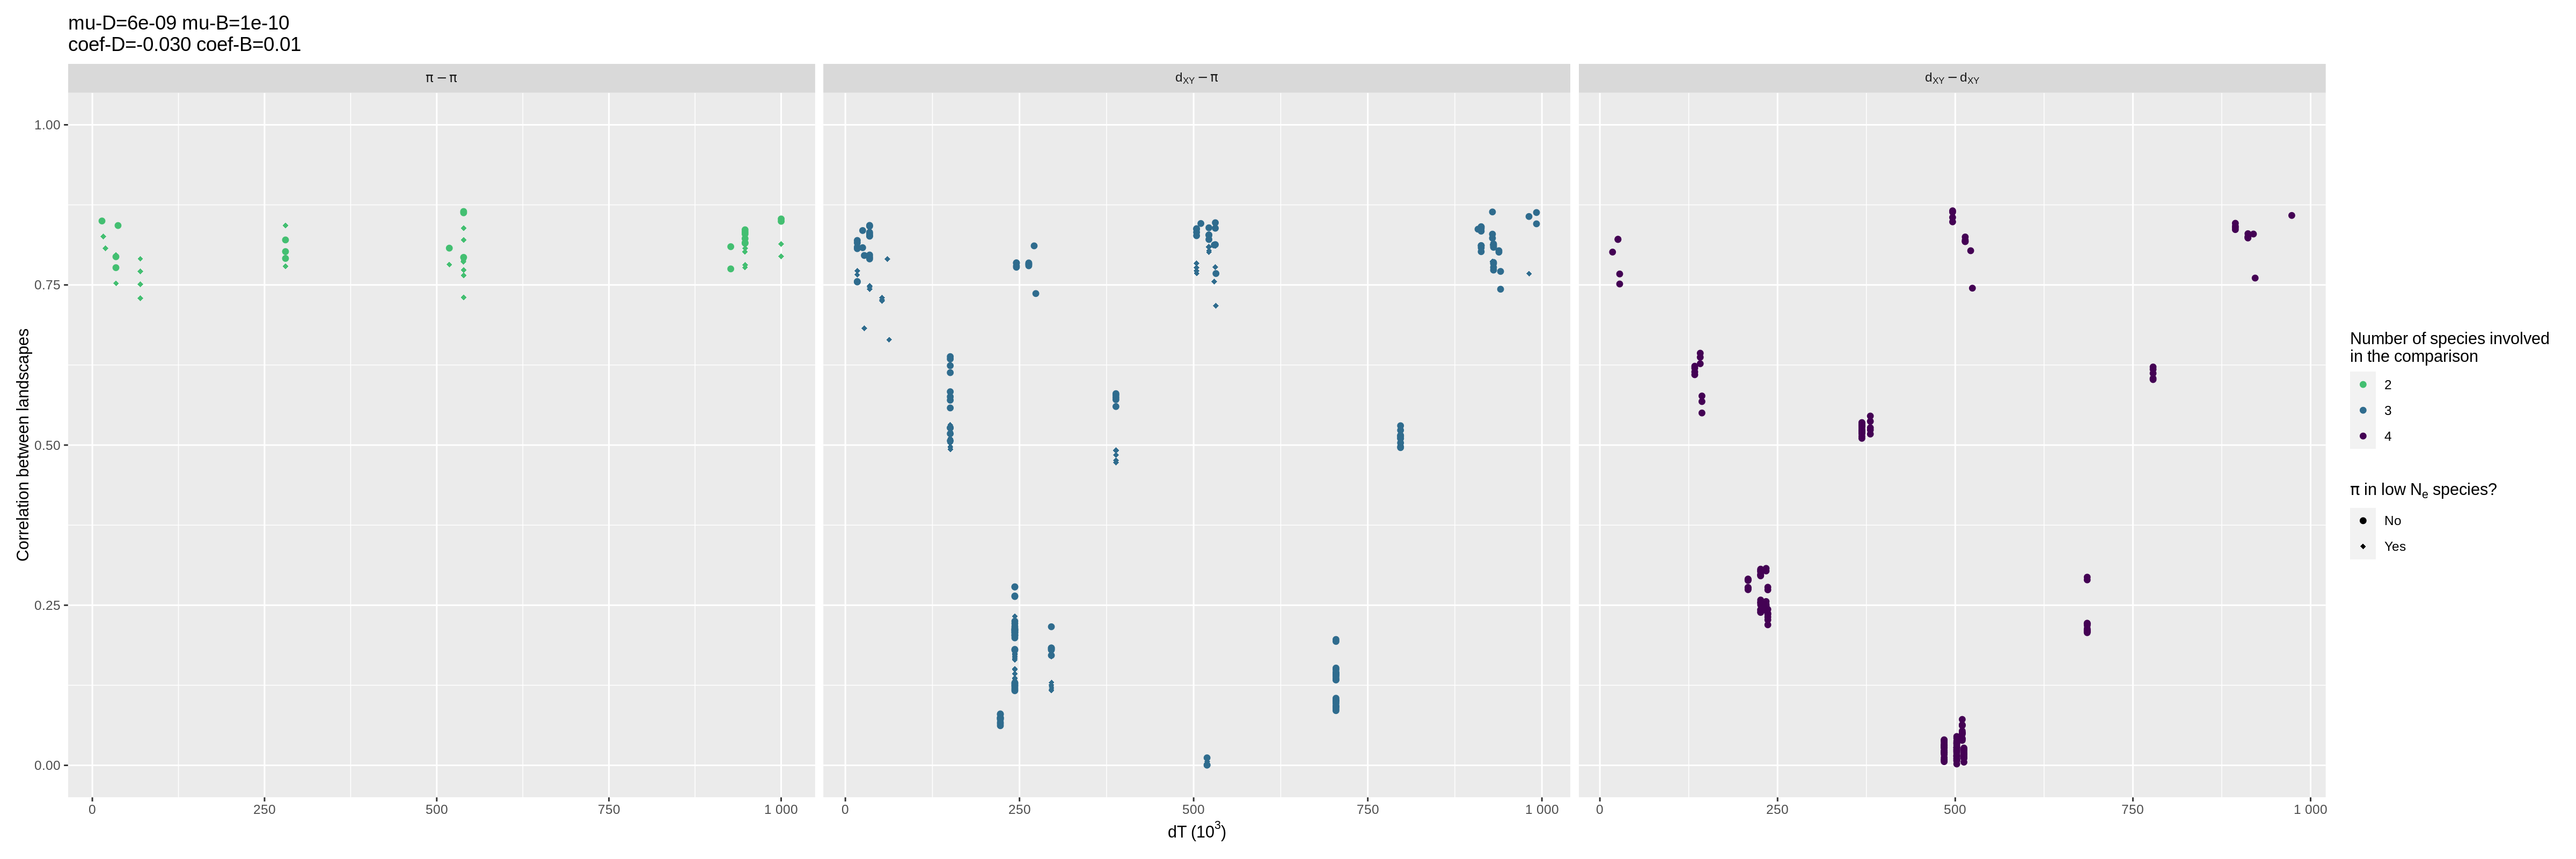

In [45]:
options(repr.plot.width = 24, repr.plot.height = 8, repr.plot.res = 200)

wrap_plots(plots, nrow=length(classes), design=design, guides="collect")


In [ ]:
getwd()

In [ ]:
tmp